In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'fact_bookings.csv'
data = pd.read_csv(file_path)

In [3]:
data['booking_date'] = pd.to_datetime(data['booking_date'])
data['check_in_date'] = pd.to_datetime(data['check_in_date'])
data['checkout_date'] = pd.to_datetime(data['checkout_date'])

In [4]:
top_properties = data.groupby('property_id')['revenue_realized'].sum().sort_values(ascending=False).head(5)
print(top_properties)


property_id
16559    118448418
17563    101511080
17559     93996570
16563     89135998
17560     87996216
Name: revenue_realized, dtype: int64


In [5]:
top_room_categories = data['room_category'].value_counts()
print(top_room_categories)


room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64


In [6]:
status_distribution = data['booking_status'].value_counts()
print(status_distribution)


booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64


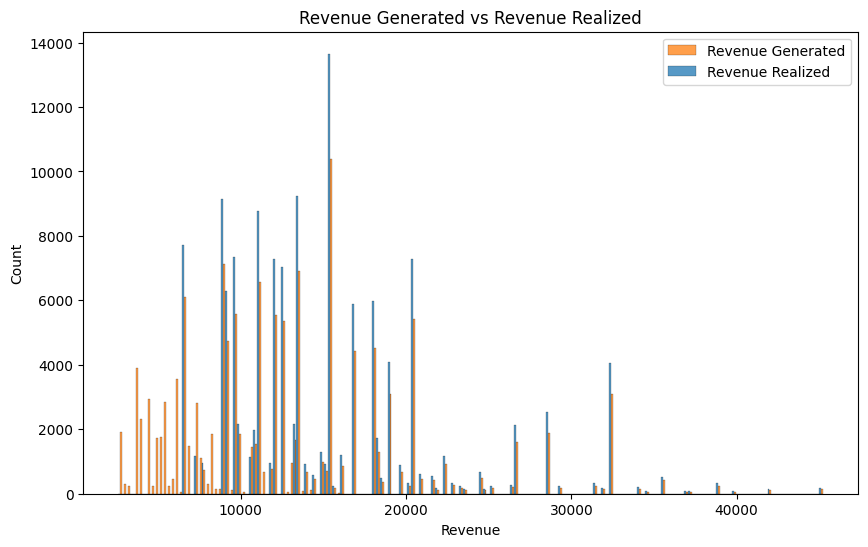

In [7]:
# 1)Revenue Analysis:
plt.figure(figsize=(10, 6))
sns.histplot(data[['revenue_generated', 'revenue_realized']], kde=False, multiple="dodge")
plt.title('Revenue Generated vs Revenue Realized')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.legend(['Revenue Generated', 'Revenue Realized'])
plt.show()


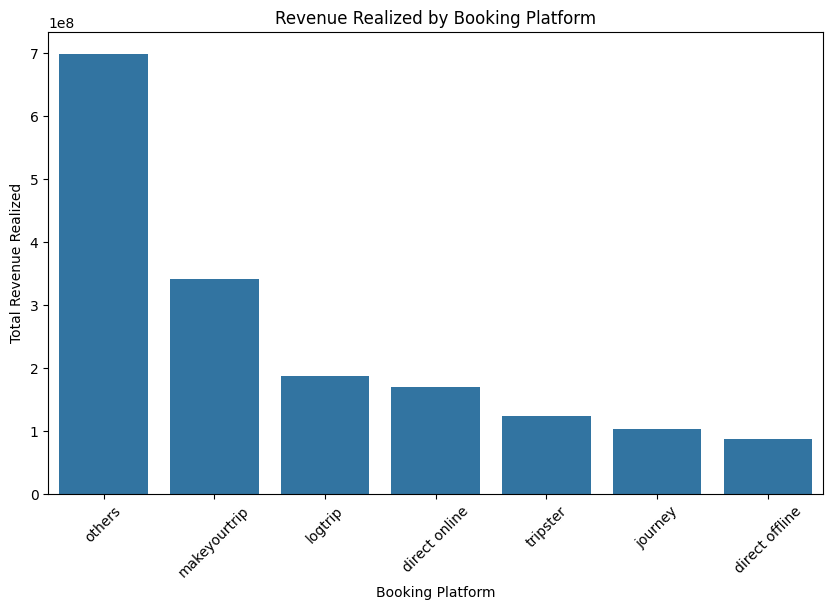

In [8]:
# 2. Booking Platform Insights:
platform_revenue = data.groupby('booking_platform')['revenue_realized'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_revenue.index, y=platform_revenue.values)
plt.title('Revenue Realized by Booking Platform')
plt.xlabel('Booking Platform')
plt.ylabel('Total Revenue Realized')
plt.xticks(rotation=45)
plt.show()

In [9]:
# 3. Guest Count Analysis:
avg_guests = data['no_guests'].mean()
print(f'Average number of guests per booking: {avg_guests:.2f}')

Average number of guests per booking: 2.04


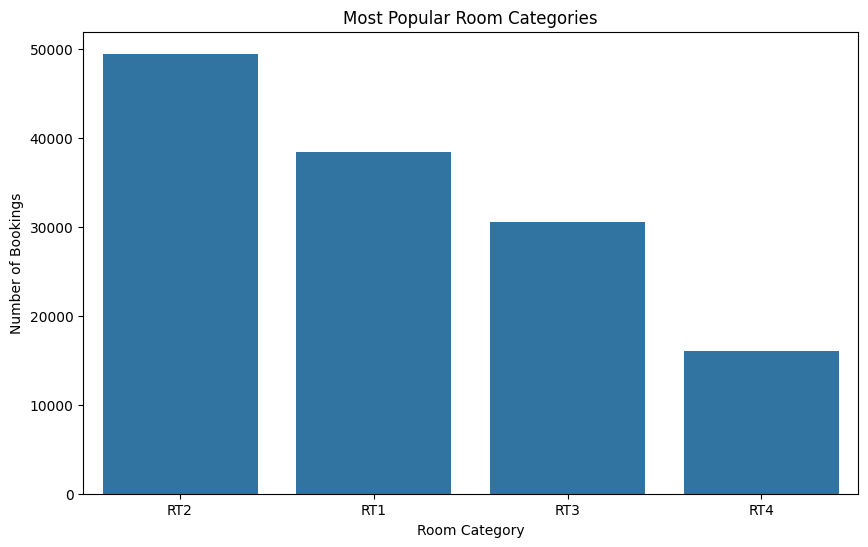

In [10]:
# 4. Room Category Insights: 
room_popularity = data['room_category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=room_popularity.index, y=room_popularity.values)
plt.title('Most Popular Room Categories')
plt.xlabel('Room Category')
plt.ylabel('Number of Bookings')
plt.show()


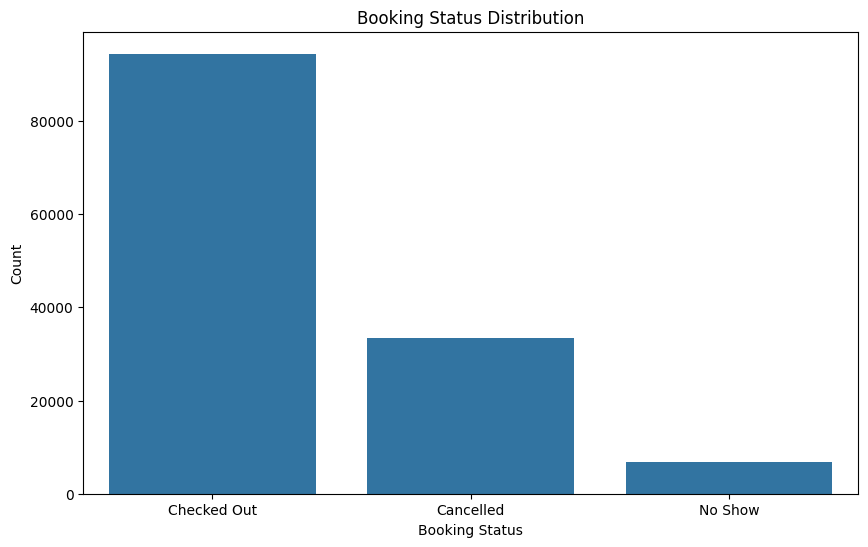

In [11]:
# 5. Booking Status Distribution
status_distribution = data['booking_status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=status_distribution.index, y=status_distribution.values)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

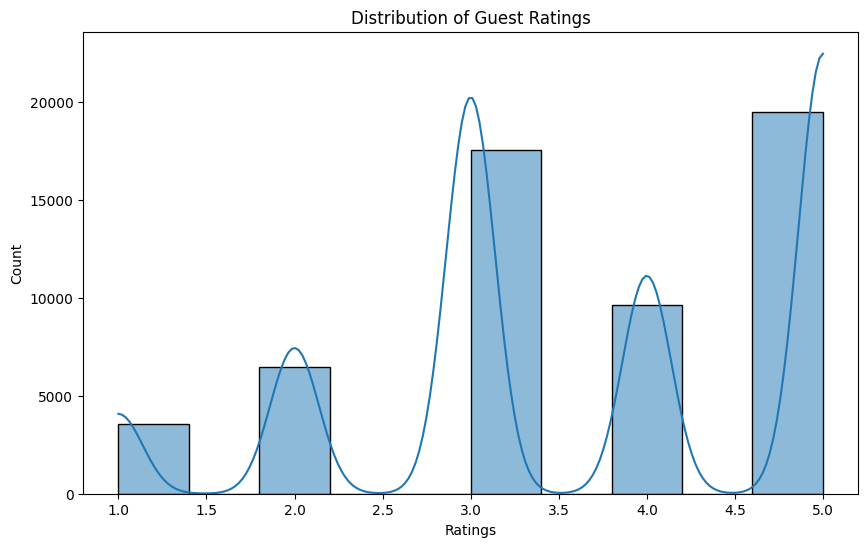

In [12]:
# 6. Ratings Analysis: Distribution of guest ratings
ratings_distribution = data['ratings_given'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_distribution, bins=10, kde=True)
plt.title('Distribution of Guest Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()
